Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Описание данных
Набор данных находится в файле /datasets/insurance.csv.

    Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
    Целевой признак: количество страховых выплат клиенту за последние 5 лет.
    

Инструкция по выполнению проекта

    Загрузите и изучите данные.
    Ответьте на вопрос и обоснуйте решение.
    Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
    a. Изменится. Приведите примеры матриц.
    b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
    Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
    Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.    

## 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

rnd_state = 202008

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


5000 строк данных, 5 признаков

In [4]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Признаки - пол, возраст и зарплата, количество членов семьи.

Целевой признак - количество страховых выплат клиенту за последние 5 лет.

пропусков нет


In [5]:
#Посмотрим дубли
data.duplicated().sum()

153

In [6]:
duplicates = data[data.duplicated()]
duplicates

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


In [7]:
#удалим дубли
df = data.drop_duplicates().reset_index(drop=True)
#data['Возраст'] = data['Возраст'].astype('int64')
#data['Зарплата'] = data['Зарплата'].astype('int64')

In [8]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [9]:
#функция для построения графиков
def draw(col):
    plt.figure(figsize=(15,.5))
    sns.boxplot(data[col])
    plt.show()
    plt.figure(figsize=(15,3))
    sns.distplot(data[col])
    plt.show()

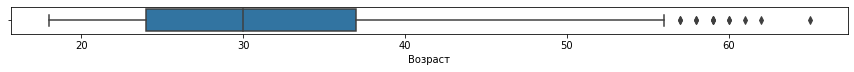

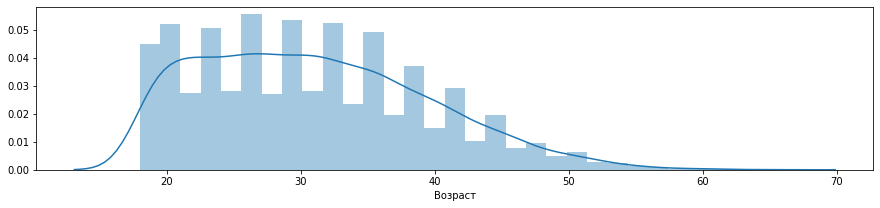

In [10]:
#посмотрим как распределяется Возраст
draw('Возраст')

нормальное распредлеление

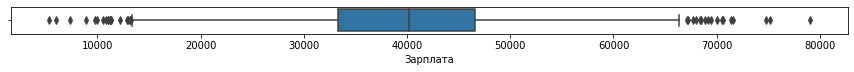

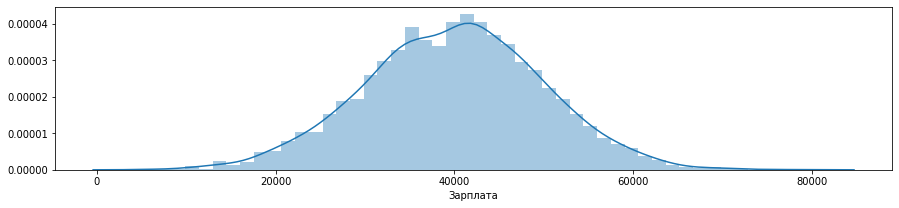

In [11]:
#посмотрим как распределяется Зарплата
draw('Зарплата')

нормальное распредлеление

In [12]:
#посмотрим как распределяются Члены семьи
data['Члены семьи'].value_counts()/data['Члены семьи'].shape[0]

1    0.3628
0    0.3026
2    0.2142
3    0.0878
4    0.0248
5    0.0064
6    0.0014
Name: Члены семьи, dtype: float64

In [13]:
#посмотрим как распределяются Страховые выплаты
data['Страховые выплаты'].value_counts()/data['Страховые выплаты'].shape[0]

0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: Страховые выплаты, dtype: float64

выплат в 88.72% случаем не было

In [14]:
#посмотрим как распределяется Пол
data['Пол'].value_counts()

0    2505
1    2495
Name: Пол, dtype: int64

In [15]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

### Выводы:

    В датасете 5000 строк данных, 5 признаков
    Пропусков не обнаружено
    Удалены 153 дубля
    Посмотрели распределение признаков
    Выбросов не обнаружено

## 2. Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножениии матрицы признаков на обратимую матрицу предсказания не изменятся

**Обоснование:** 

Будем использовать свойства:

$$
AB \neq BA
$$

$$
(AB)^{-1} = B^{-1}A^{-1}
$$

$$ (AB)^{T} = B^{T}A^{T} $$

$$ AA^{-1} = E $$

$$ АЕ = ЕА = А $$


Исходное уравнение весов: $$ w = (X^{T}X)^{-1}X^{T}y
$$
тогда: 
$$w'=(X'^TX')^{-1}X'^Ty$$
подставим $X'=XP$
$$w'=((XP)^TXP)^{-1}(XP)^Ty$$
используем свойство $ (AB)^{T} = B^{T}A^{T} $
$$w'=(P^TX^TXP)^{-1}P^TX^Ty$$
используем свойство-во $(AB)^{-1} = B^{-1}A^{-1}$
$$w'=P^{-1}(P^TX^TX)^{-1}P^TX^Ty$$
еще раз используем свойство-во $(AB)^{-1} = B^{-1}A^{-1}$
$$w'= P^{-1}(X^{T}X)^{-1}P^{T^{-1}}P^{T}X^{T}y$$
используем свойство $ AA^{-1} = E $
$$w'=P^{-1}(X^TX)^{-1}EX^Ty$$
используем свойство $ АЕ = ЕА = А $
$$w'=P^{-1}(X^TX)^{-1}X^Ty$$
но $ w = (X^{T}X)^{-1}X^{T}y$, тогда
$$w'=P^{-1}w$$


$$a'=XPw'$$
$$a'=XPP^{-1}w$$
используем свойство $ AA^{-1} = E $
$$a'=XEw$$
$$a'=Xw$$
$$a'= a$$

Что и требовалось доказать
$$a = Xw = X'w' = XPw' = a'$$
Такое преобразование не повлияет на предсказание


## 3. Алгоритм преобразования

**Алгоритм:**

    Определяем признаки и целевой признак
    Обучаем модель без преобразований
    Вычисляем метрику R2 модели без преобразования
    Создаем случайную квадратную обратимую матрицу преобразований, размером равным количеству признаков.
    Умножаем обратимую матрицу на матрицу признаков
    Обучаем модель с преобразованными признаками
    Вычисляем метрику R2 модели с преобразованными признаками
    Сравниваем метрики модели без преобразования и модели с преобразованием



**Обоснование**

Для преобразования/шифрования ипользуем доказанное в п.2.:
$$a = Xw = X'w' = XPw' = a'$$
$$w'=P^{-1}w$$


## 4. Проверка алгоритма

In [126]:
#признаки и целевой признак
X = data.drop('Страховые выплаты', axis = 1)
Y = data['Страховые выплаты']

In [127]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=rnd_state)

In [128]:
#проверяем размерности
y_train.shape[0], x_train.shape[0]

(3750, 3750)

In [129]:
class LinearRegression:
    def fit(self, x_traine, y_traine):
        x_traine_matrix = np.concatenate((np.ones((x_traine.shape[0], 1)), x_traine), axis=1)
        y_traine_vector = np.array(y_traine)       
        w = np.linalg.inv(x_traine_matrix.T @ x_traine_matrix) @ x_traine_matrix.T @ y_traine_vector
        self.w = w[1:]
        self.w0 = w[0]
        print(self.w)
        return self.w, self.w0  
 
    def predict(self, x_teste):
        x_teste_matrix = x_teste.values
        a = x_teste_matrix @ self.w + self.w0 
        return a

In [130]:
model = LinearRegression()
model.fit(x_train, y_train)
predicted = pd.Series(model.predict(x_test))

[-8.20819103e-04  3.58698399e-02 -7.53143112e-07 -1.24811654e-02]


In [131]:
r2 = r2_score(y_test, predicted)
print(r2)

0.408884634182783


In [132]:
model = LinearRegression()
model.fit(X, Y)
predicted = pd.Series(model.predict(X))

[ 7.92580543e-03  3.57083050e-02 -1.70080492e-07 -1.35676623e-02]


In [133]:
r2_without_cripto = r2_score(Y, predicted)
print(r2_without_cripto)

0.4249455028666801


In [134]:
#Модель для преобразования/шифрования
model_cripto = LinearRegression()

In [135]:
#преобразовываем/шифруем
loc = np.random.randint(2,100)
std = np.random.randint(2,100)
P = np.random.normal(loc, std, size=(4,4)).astype('int64')
X_cripto = pd.DataFrame(data = X.values@P, columns = X.columns)

In [136]:
#Проверка на преобразование/шифрование данных
model_cripto.fit(X_cripto, Y)
predicted = pd.Series(model_cripto.predict(X_cripto))
r2_with_cripto = r2_score(Y, predicted)

[ 1.51397387e-03 -9.37609069e-05 -9.54171166e-04 -5.51970887e-04]


In [137]:
#сравниваем метрики R2
print(r2_without_cripto)
print(r2_with_cripto)

0.4249455028666801
0.424945502862929


### Выводы:
Значения метрик R2 для моделей обученных на исходных и преобразованных данных практически не отличаются, что подтверждает теоретический вывод.

In [138]:
display(X_cripto)

,Пол,Возраст,Зарплата,Члены семьи
0,3177744.0,3325523.0,2531670.0,3772157.0
1,2435658.0,2548529.0,1940250.0,2890763.0
2,1346262.0,1408537.0,1072363.0,1597711.0
3,2670578.0,2795195.0,2127863.0,3170537.0
4,1672660.0,1750243.0,1332471.0,1985341.0
...,...,...,...,...
4995,2287124.0,2393566.0,1822192.0,2714950.0
4996,3356322.0,3512693.0,2674086.0,3984455.0
4997,2171300.0,2272542.0,1730016.0,2577678.0
4998,2094802.0,2192398.0,1669053.0,2486734.0
